In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
def draw_investment_clock_with_indicators(index, base, title, cpi, gdp,
                                          country, start_date):
    index = index[country].loc[start_date:]
    # Using Exponential Moving Average to smooth out values
    index = index.ewm(com=1.5).mean().dropna()
        
    x = (index - base)[1:]
    xmax = x.abs().max()
    x = x * (10/xmax)
    
    y = index.diff().dropna()
    ymax = y.abs().max()
    y = y * (10/ymax)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    ax1.plot(index)
    ax1.set_title(title)
    plt.gcf().autofmt_xdate()                

    ax2.annotate(index.index[0].strftime('%Y-%m'), 
                 xy=(x.iloc[0], y.iloc[0]), xytext=(x.iloc[0]+1, y.iloc[0]+1),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.plot(x.iloc[:-7], y.iloc[:-7])
    ax2.annotate(index.index[-8].strftime('%Y-%m'), 
                 xy=(x.iloc[-8], y.iloc[-8]), xytext=(x.iloc[-7]-5, y.iloc[-7]-5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.plot(x.iloc[-8:], y.iloc[-8:])
    ax2.annotate(index.index[-1].strftime('%Y-%m'), 
                 xy=(x.iloc[-1], y.iloc[-1]), xytext=(x.iloc[-1]-7, y.iloc[-1]+5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    ax2.set_title('Investment Clock')
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(-15, 15)
    ax2.axhline(y=0, color='gray')
    ax2.axvline(x=0, color='gray')
    
    ax2.text(-14, 14, 'Recovery')
    ax2.text(9, 14, 'Overheat')
    ax2.text(8, -14, 'Stagflation')
    ax2.text(-14, -14, 'Reflation')

    ax3.plot(cpi[country].loc[start_date:], label='CPI')
    ax3.plot(gdp[country].loc[start_date:], label='GDP')
    ax3.set_title('CPI & GDP')
    ax3.legend(loc="upper right")

    # Colour different stages
    for i, idx in enumerate(index.index[1:]):
        if index.loc[idx] >= index.loc[:idx].iloc[-2]:
            if index.loc[idx] < base:
                ax1.axvspan(idx, index.index[i], facecolor='g', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='g', alpha=0.2)
            else:
                ax1.axvspan(idx, index.index[i], facecolor='r', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='r', alpha=0.2)
        else:
            if index.loc[idx] < base:
                ax1.axvspan(idx, index.index[i], facecolor='b', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='b', alpha=0.2)
            else:
                ax1.axvspan(idx, index.index[i], facecolor='orange', alpha=0.2)
                ax3.axvspan(idx, index.index[i], facecolor='orange', alpha=0.2)

    ax2.fill_between([0, 15], 0, 15, facecolor='r', alpha=0.2)
    ax2.fill_between([-15, 0], 0, 15, facecolor='g', alpha=0.2)
    ax2.fill_between([0, 15], -15, 0, facecolor='orange', alpha=0.2)
    ax2.fill_between([-15, 0], -15, 0, facecolor='blue', alpha=0.2)


    plt.show()

In [161]:
cpi = pd.read_csv('Data\OECD_Stats\OECD_KEI_CPALTT01.csv', parse_dates=True, index_col=0)
gdp = pd.read_csv('Data\OECD_Stats\OECD_QNA_B1_GE.csv', parse_dates=True, index_col=0)

C:\Users\lukas\AppData\Local\Temp\ipykernel_468\3044943108.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp = pd.read_csv('Data\OECD_Stats\OECD_QNA_B1_GE.csv', parse_dates=True, index_col=0)


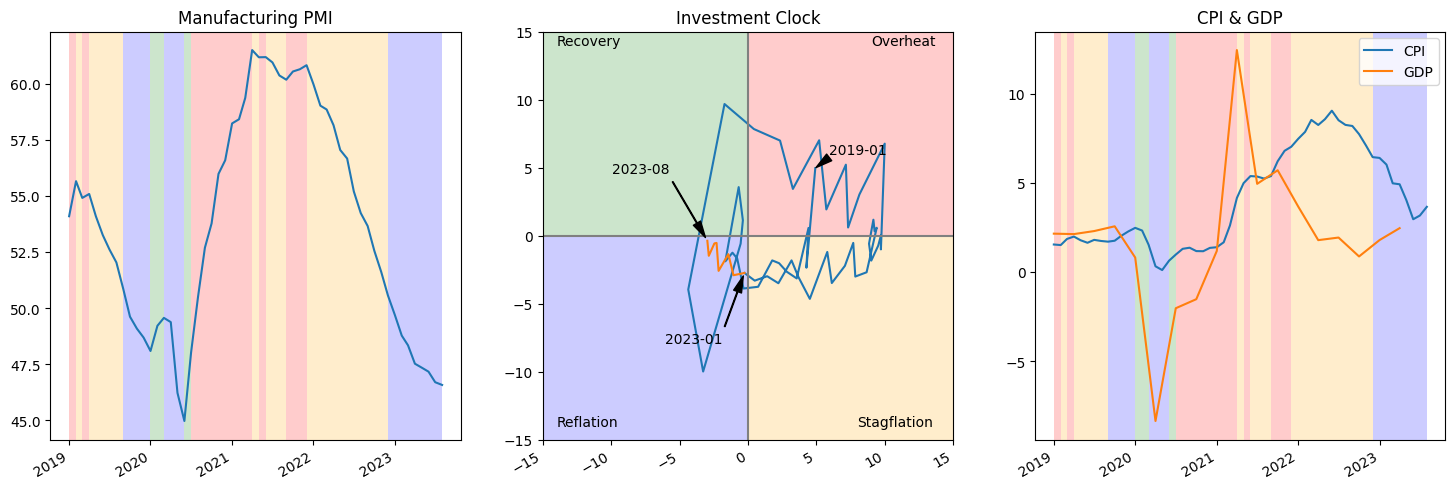

In [162]:
pmi = pd.read_csv('Data\Investing_PMI\PMI_2012-08-2022.csv', parse_dates=True, index_col=0)
draw_investment_clock_with_indicators(pmi, base=50, title='Manufacturing PMI', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

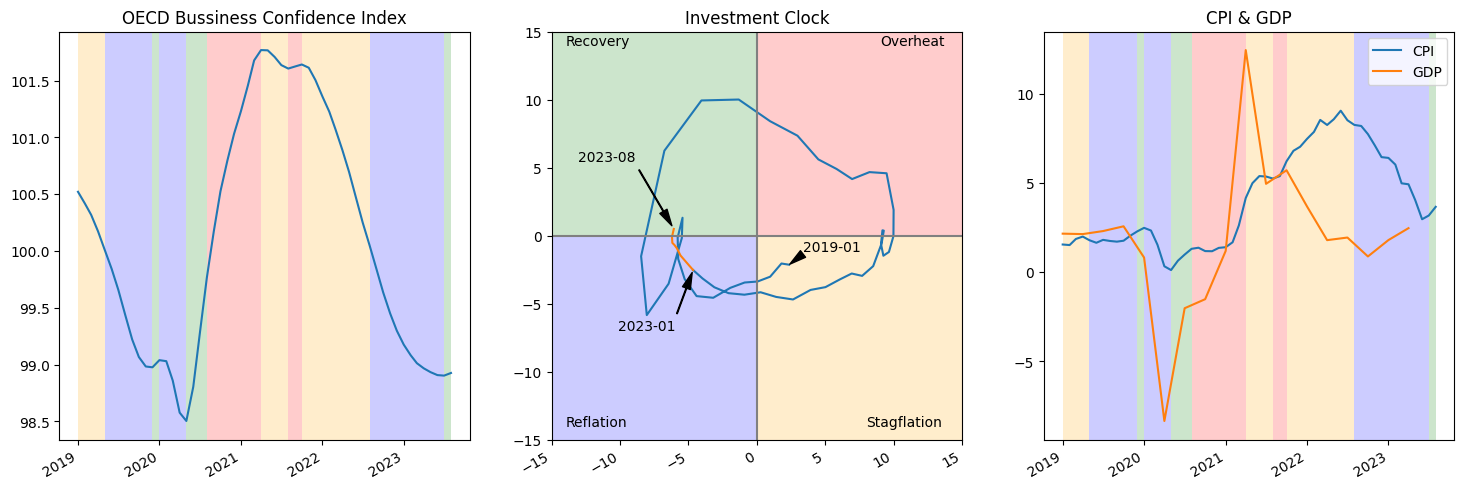

In [163]:
bci = pd.read_csv('Data\OECD_Stats\OECD_MEI_CLI_BSCICP03.csv', parse_dates=True, index_col=0)
draw_investment_clock_with_indicators(bci, base=100, title='OECD Bussiness Confidence Index', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

<img src="Docs/InvestmentClock_byMerrillLyinch.png"  alt="drawing" width="600"/>

In [164]:
pmi['United States'].corr(bci['United States'])

0.933334396672776

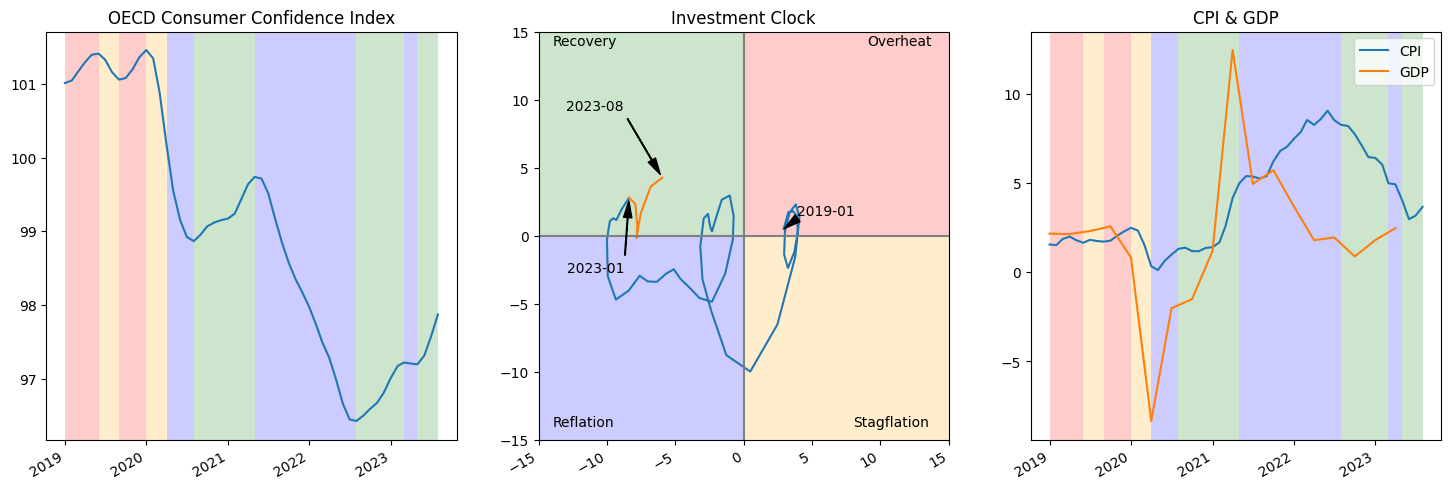

In [165]:
cci = pd.read_csv('Data\OECD_Stats\OECD_MEI_CLI_CSCICP03.csv', parse_dates=True, index_col=0)
draw_investment_clock_with_indicators(cci, base=100, title='OECD Consumer Confidence Index', 
                      cpi=cpi, gdp=gdp, country='United States',
                      start_date='2019-01')

In [166]:
pmi['United States'].corr(cci['United States'])

0.1827533923786057

In [167]:
cpi['United States'].corr(cci['United States'])

-0.31068731913852854

## Investment clock for selected countries

In [168]:
bci_selected = bci[['United States', 'Euro area (19 countries)', 'Japan', 'United Kingdom', 'China (People\'s Republic of)', 'India', 'Korea', 'Brazil']]
bci_selected.tail(10)

,United States,Euro area (19 countries),Japan,United Kingdom,China (People's Republic of),India,Korea,Brazil
2022-11-01,99.17565,100.72970,100.5656,100.54450,97.00128,102.7773,98.61059,99.39417
2022-12-01,99.06994,100.79860,100.5511,100.42020,97.20875,102.6507,98.36553,99.24927
2023-01-01,98.99246,100.89800,100.4717,100.36200,98.37746,102.4338,98.15903,99.21899
2023-02-01,98.94336,100.85940,100.3675,100.10610,99.41262,102.1858,98.06164,99.25668
2023-03-01,98.90659,100.66240,100.2938,99.85036,99.34315,NaN,98.07961,99.37622
2023-04-01,98.89899,100.32200,100.2939,99.55035,98.46265,NaN,98.21517,99.42391
2023-05-01,98.88395,99.91407,100.3411,99.48969,97.78954,NaN,98.30049,99.37453
2023-06-01,98.86854,99.51776,100.4047,99.79144,97.59743,NaN,98.30652,99.30090
2023-07-01,98.89616,99.16720,NaN,100.19040,97.74020,NaN,98.22063,99.14629
2023-08-01,98.96121,98.86824,NaN,100.07350,98.01802,NaN,98.07768,98.98843


In [169]:
def draw_simple_investment_clock(index, base, ax2, country, start_date):
    index = index[country].loc[start_date:]
    # Using Exponential Moving Average to smooth out values
    index = index.ewm(com=1.5).mean().dropna()
        
    x = (index - base)[1:]
    xmax = x.abs().max()
    x = x * (10/xmax)
    
    y = index.diff().dropna()
    ymax = y.abs().max()
    y = y * (10/ymax)

    ax2.plot(x.iloc[:-7], y.iloc[:-7])
    ax2.plot(x.iloc[-8:], y.iloc[-8:])
    ax2.annotate(index.index[-1].strftime('%Y-%m'), 
                 xy=(x.iloc[-1], y.iloc[-1]), xytext=(x.iloc[-1]-7, y.iloc[-1]+5),
                 arrowprops=dict(facecolor='black', shrink=0.05, 
                                 width=0.5, headwidth=6))
    
    ax2.set_title(country)
    ax2.set_xlim(-15, 15)
    ax2.set_ylim(-15, 15)
    ax2.axhline(y=0, color='gray')
    ax2.axvline(x=0, color='gray')
    ax2.text(-14, 13, 'Recovery')
    ax2.text(8, 13, 'Overheat')
    ax2.text(7, -14, 'Stagflation')
    ax2.text(-14, -14, 'Reflation')

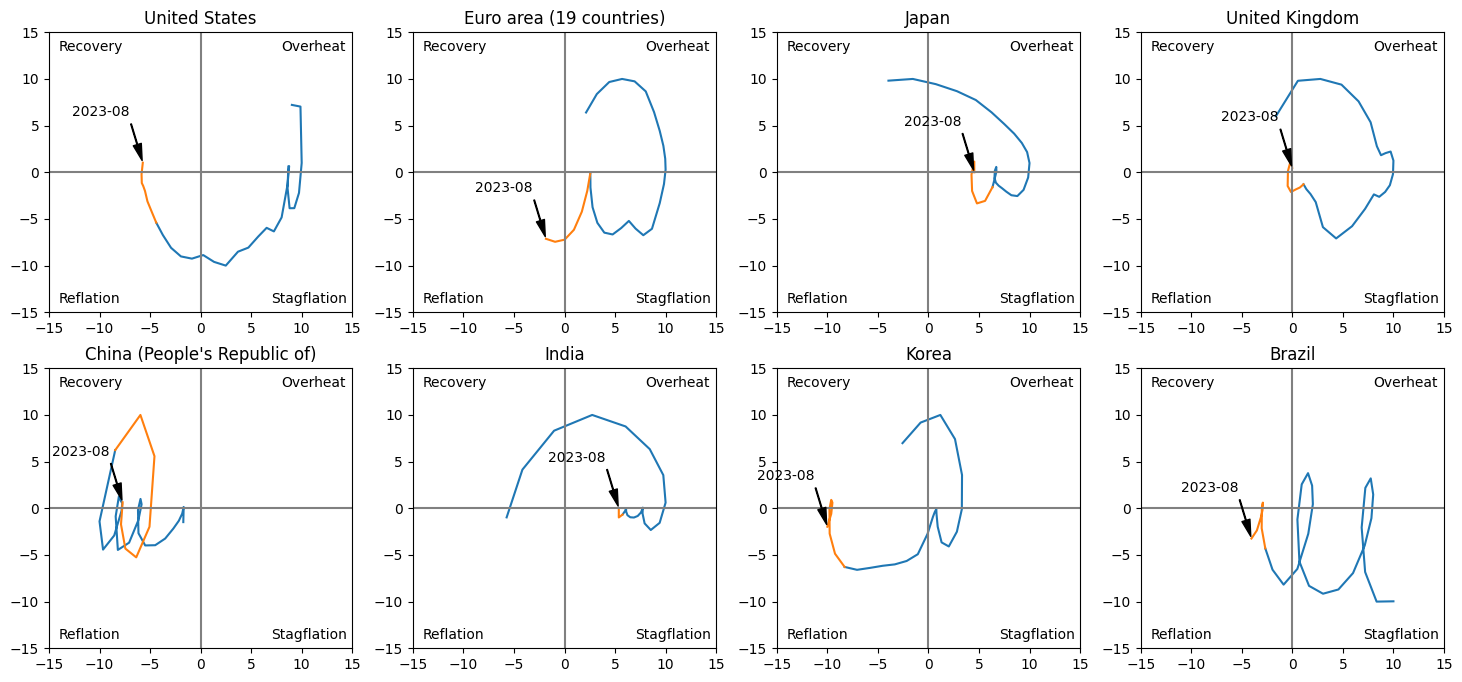

In [170]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
start_date = '2021'

i = 0
j = 0
for country in bci_selected.columns:
    draw_simple_investment_clock(bci_selected, 100, ax[i,j], country, start_date)
    j += 1
    if j == 4:
        i += 1
        j = 0


In [171]:
pmi_selected = pmi[['United States', 'Eurozone', 'Japan', 'United Kingdom', 'China', 'India', 'Korea', 'Brazil']]
pmi_selected.tail(10)

,United States,Eurozone,Japan,United Kingdom,China,India,Korea,Brazil
2022-11-01,50.2,46.4,50.7,46.2,49.2,55.3,48.2,50.8
2022-12-01,49.0,47.1,49.0,46.5,48.0,55.7,49.0,44.3
2023-01-01,48.4,47.8,48.9,45.3,47.0,57.8,48.2,44.2
2023-02-01,47.4,48.8,48.9,47.0,50.1,55.4,48.5,47.5
2023-03-01,47.7,48.5,47.7,49.3,52.6,55.3,48.5,49.2
2023-04-01,46.3,47.3,49.2,47.9,51.9,56.4,47.6,47.0
2023-05-01,47.1,45.8,49.5,47.8,49.2,57.2,48.1,44.3
2023-06-01,46.9,44.8,50.6,47.1,48.8,58.7,48.4,47.1
2023-07-01,46.0,43.4,49.8,46.5,49.0,57.8,47.8,46.6
2023-08-01,46.4,42.7,49.6,45.3,49.3,57.7,49.4,47.8


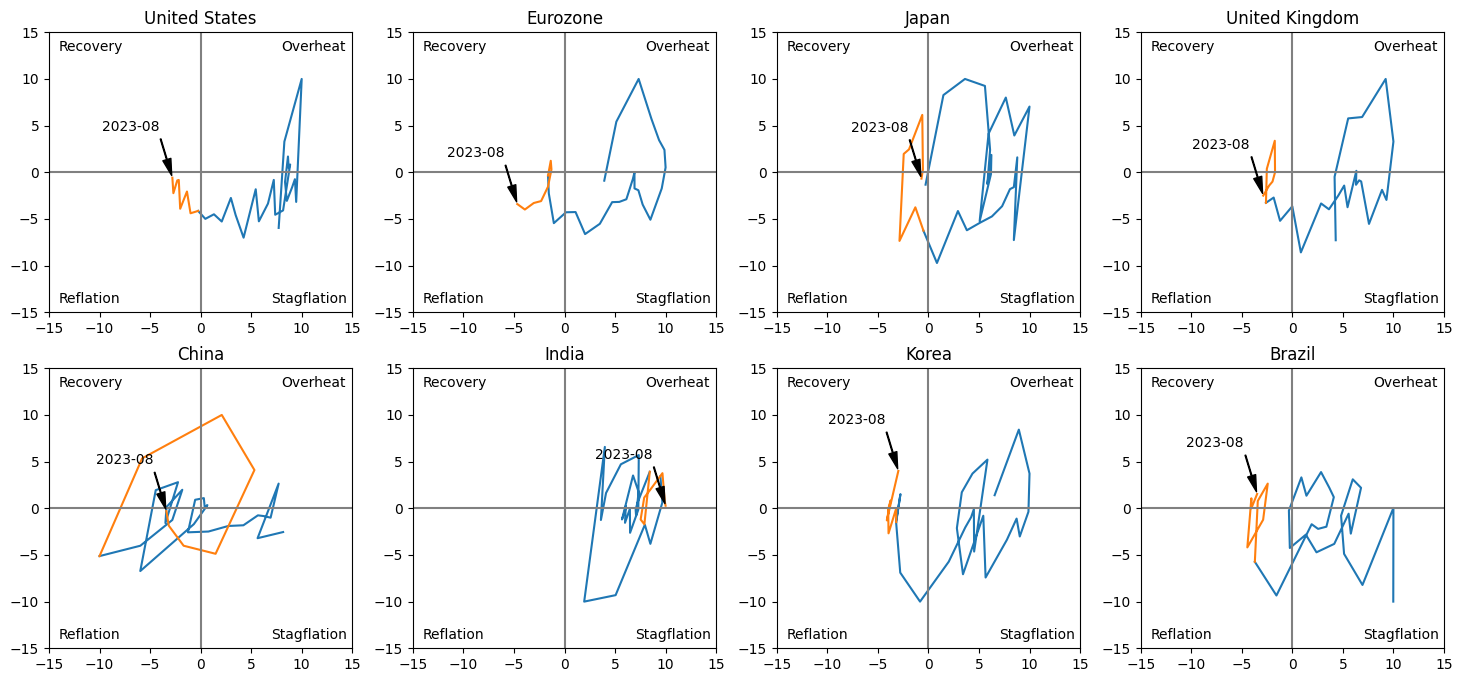

In [172]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
start_date = '2021'

i = 0
j = 0
for country in pmi_selected.columns:
    draw_simple_investment_clock(pmi_selected, 50, ax[i,j], country, start_date)
    j += 1
    if j == 4:
        i += 1
        j = 0

## Indicators from Fidelity to try to incorporate into investment clock

- Economic activity (GDP, Industrial Production, Employment, Incomes)
- Credit, Customer Credit?
- Profits
- Interest Rates
- Inventories and Sales

<img src="Docs/BussinessCycles_Fidelity.png"  alt="drawing" width="1000"/>